In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

>1. Generate 50 2D-data points
>2. Add Gaussian random noise to the data

In [3]:
# Define the true function y = sin(x^2 + 1)
def true_function(x):
    return np.sin(x**2 + 1)

# Generate 50 2D data points with Gaussian noise
np.random.seed(0)  # Set a seed for reproducibility
num_points = 50
x_start = 0
x_end = 1
x_data = np.linspace(x_start,x_end,num_points)
N = len(x_data)
y_true = true_function(x_data)
sigma = 0.05
y_noisy = y_true + np.random.normal(0, sigma, num_points)

>3. Fit the generated noisy data using the MLE that employs the Gaussian basis functions as discussed in class.
>4. Show your results for different values of M that generate overfitting and underfitting curves.

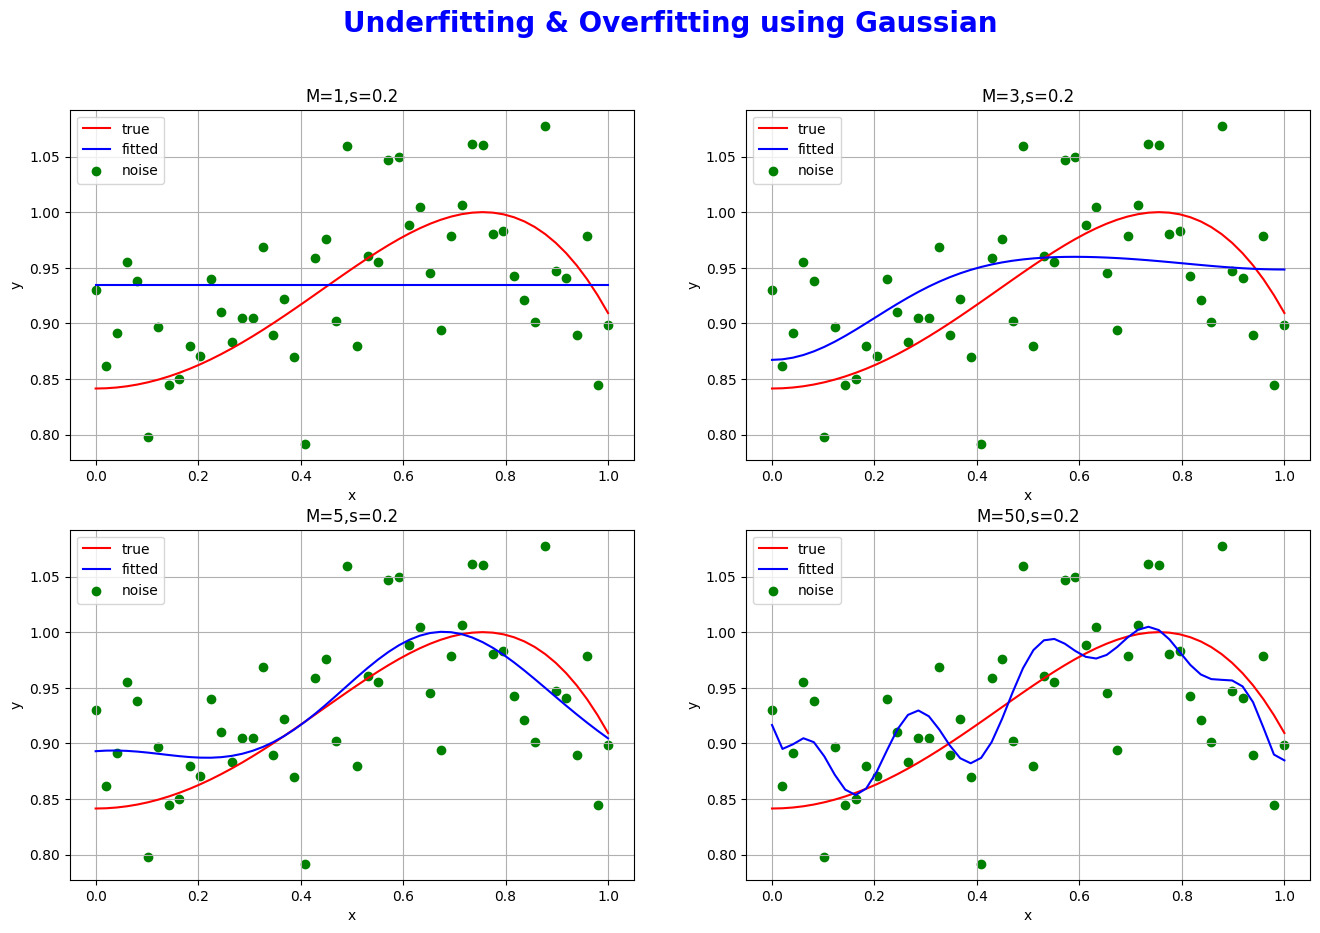

In [4]:
# Define the polynomial basis function
def gaussian(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2)

def basis_function_G(x,M,s):
    basis_functions = [gaussian(x, mu=np.linspace(x_start,x_end,M-1)[i],sigma=s) for i in range(M-1)]
    return basis_functions

# Define the MAP objective function
def MAP_fitting_G(x, y, M, s):
    px = np.ones([N, M])
    t_ = np.zeros([N, 1])

    for n in range(N):
        px[n][1:] = basis_function_G(x[n], M, s)
        t_[n] = y[n]

    xx = np.dot(px.T, px)
    xx_inverse = linalg.pinv(xx)
    k = np.dot(xx_inverse, px.T)
    w = np.dot(k, t_)
    w = np.squeeze(w)
    return w, px

plt.figure(figsize=(16, 10))
M_= [1,3,5,50]
s = 0.2
for i, M in enumerate(M_):
    w,px = MAP_fitting_G(x_data,y_noisy,M,s)
    y_fitted = px.dot(w)
    plt.subplot(2,2,i+1)
    plt.plot(x_data, y_true, 'r-', label='true')
    plt.plot(x_data, y_fitted, 'b-', label = 'fitted')
    plt.scatter(x_data, y_noisy, c='g', marker='o', label='noise')
    plt.title(f'M={M},s={s}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
plt.suptitle('Underfitting & Overfitting using Gaussian', fontsize=20, fontweight='bold', color='blue')
plt.show()

>5. Change the basis functions to the sigmoid basis functions, and show the results for different values of M that generate overfitting and underfitting curves.

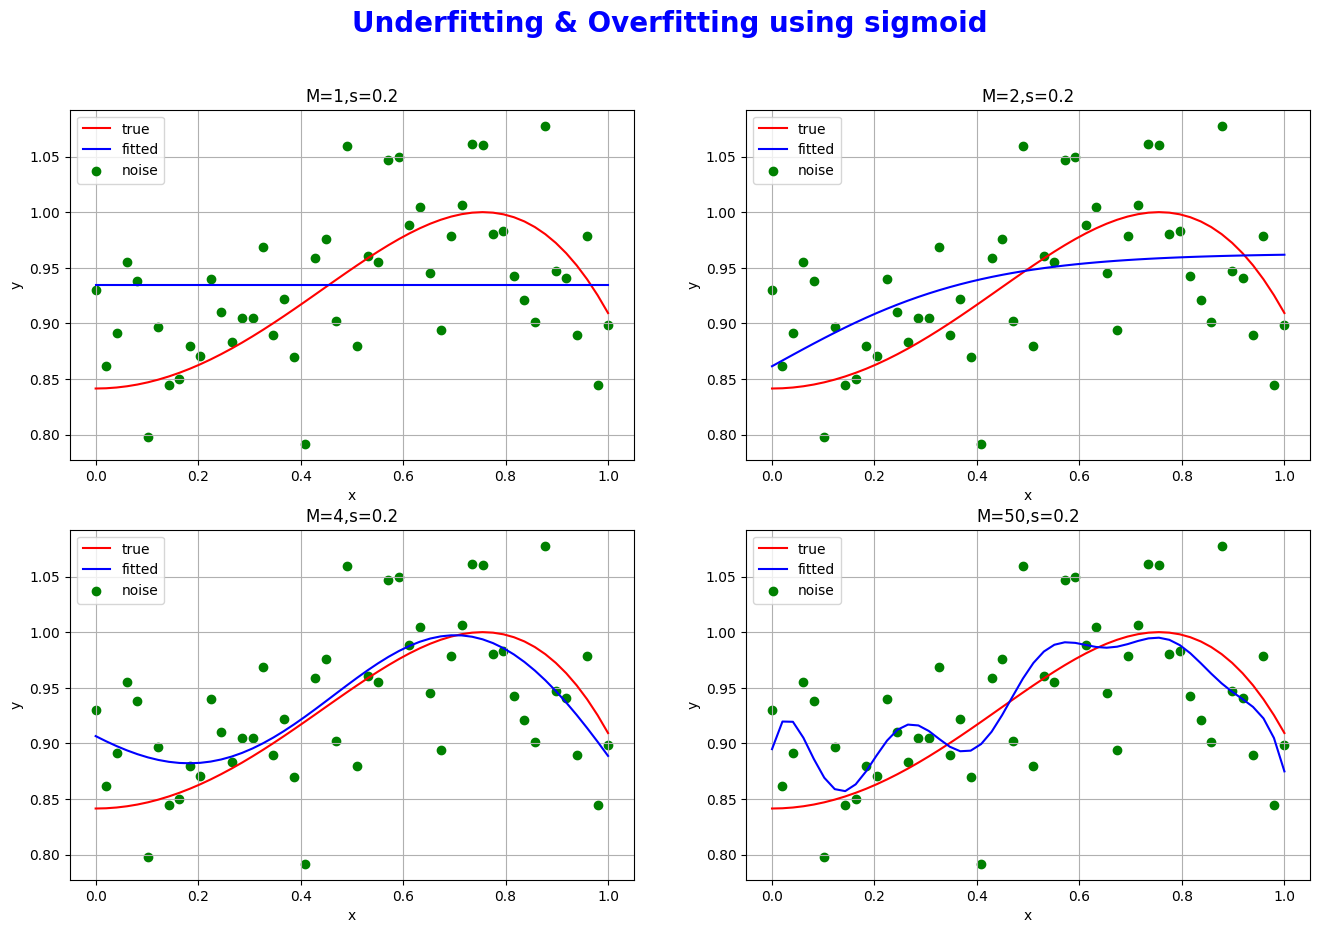

In [5]:
# Define the polynomial basis function
def sigmoid(x, mu, sigma):
    a = (x-mu)/sigma
    return 1/(1+np.exp(-a))

def basis_function_S(x,M,s):
    basis_functions = [sigmoid(x, mu=np.linspace(x_start,x_end,M-1)[i],sigma=s) for i in range(M-1)]
    return basis_functions

# Define the MAP objective function
def MAP_fitting_S(x, y, M, s):
    px = np.ones([N, M])
    t_ = np.zeros([N, 1])

    for n in range(N):
        px[n][1:] = basis_function_S(x[n], M, s)
        t_[n] = y[n]

    xx = np.dot(px.T, px)
    xx_inverse = linalg.pinv(xx)
    k = np.dot(xx_inverse, px.T)
    w = np.dot(k, t_)
    w = np.squeeze(w)
    return w, px

plt.figure(figsize=(16, 10))
M_= [1,2,4,50]
s = 0.2
for i, M in enumerate(M_):
    w,px = MAP_fitting_S(x_data,y_noisy,M,s)
    y_fitted = px.dot(w)
    plt.subplot(2,2,i+1)
    plt.plot(x_data, y_true, 'r-', label='true')
    plt.plot(x_data, y_fitted, 'b-', label = 'fitted')
    plt.scatter(x_data, y_noisy, c='g', marker='o', label='noise')
    plt.title(f'M={M},s={s}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
plt.suptitle('Underfitting & Overfitting using sigmoid', fontsize=20, fontweight='bold', color='blue')
plt.show()

>6. Change the original curve function, and use the sigmoid basis function to estimate the best curve fitting from the noisy data.

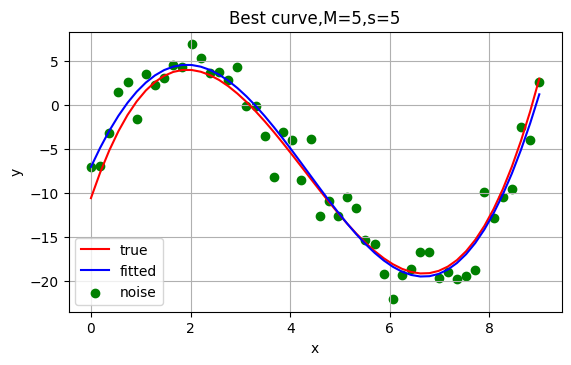

In [6]:
def true_function_changed(x):
    return 0.4345*x**3-5.607*x**2+16.78*x-10.61

def basis_function_S(x,M,s):
    basis_functions = [sigmoid(x, mu=np.linspace(x_start,x_end,M-1)[i],sigma=s) for i in range(M-1)]
    return basis_functions

np.random.seed(0)  # Set a seed for reproducibility
num_points = 50
x_start = 0
x_end = 9
x_data = np.linspace(x_start,x_end,num_points)
N = len(x_data)
y_true = true_function_changed(x_data)
sigma = 2
y_noisy = y_true + np.random.normal(0, sigma, num_points)

M = 5
s = 5
plt.figure(figsize=(14, 8))
w,px = MAP_fitting_S(x_data,y_noisy,M,s)
y_fitted = px.dot(w)
plt.subplot(2,2,i+1)
plt.plot(x_data, y_true, 'r-', label='true')
plt.plot(x_data, y_fitted, 'b-', label = 'fitted')
plt.scatter(x_data, y_noisy, c='g', marker='o', label='noise')
plt.title(f'Best curve,M={M},s={s}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

>7. Experiment with different parameters of the Gaussian and sigmoid basis functions, and then show the plot.

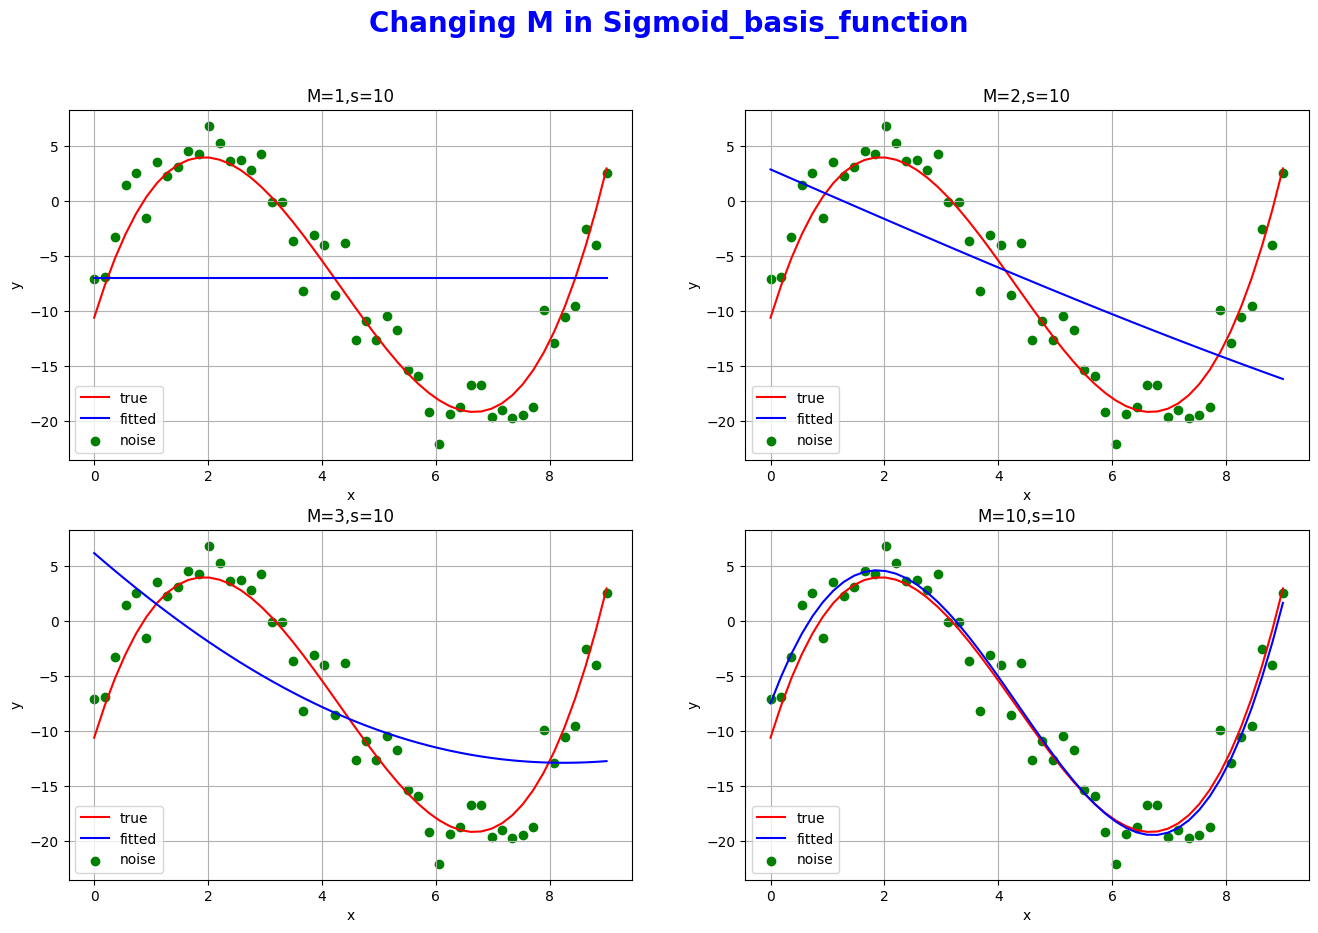

In [7]:

plt.figure(figsize=(16, 10))
M_= [1,2,3,10]
s = 10
for i, M in enumerate(M_):
    w,px = MAP_fitting_S(x_data,y_noisy,M,s)
    y_fitted = px.dot(w)
    plt.subplot(2,2,i+1)
    plt.plot(x_data, y_true, 'r-', label='true')
    plt.plot(x_data, y_fitted, 'b-', label = 'fitted')
    plt.scatter(x_data, y_noisy, c='g', marker='o', label='noise')
    plt.title(f'M={M},s={s}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
plt.suptitle('Changing M in Sigmoid_basis_function', fontsize=20, fontweight='bold', color='blue')
plt.show()

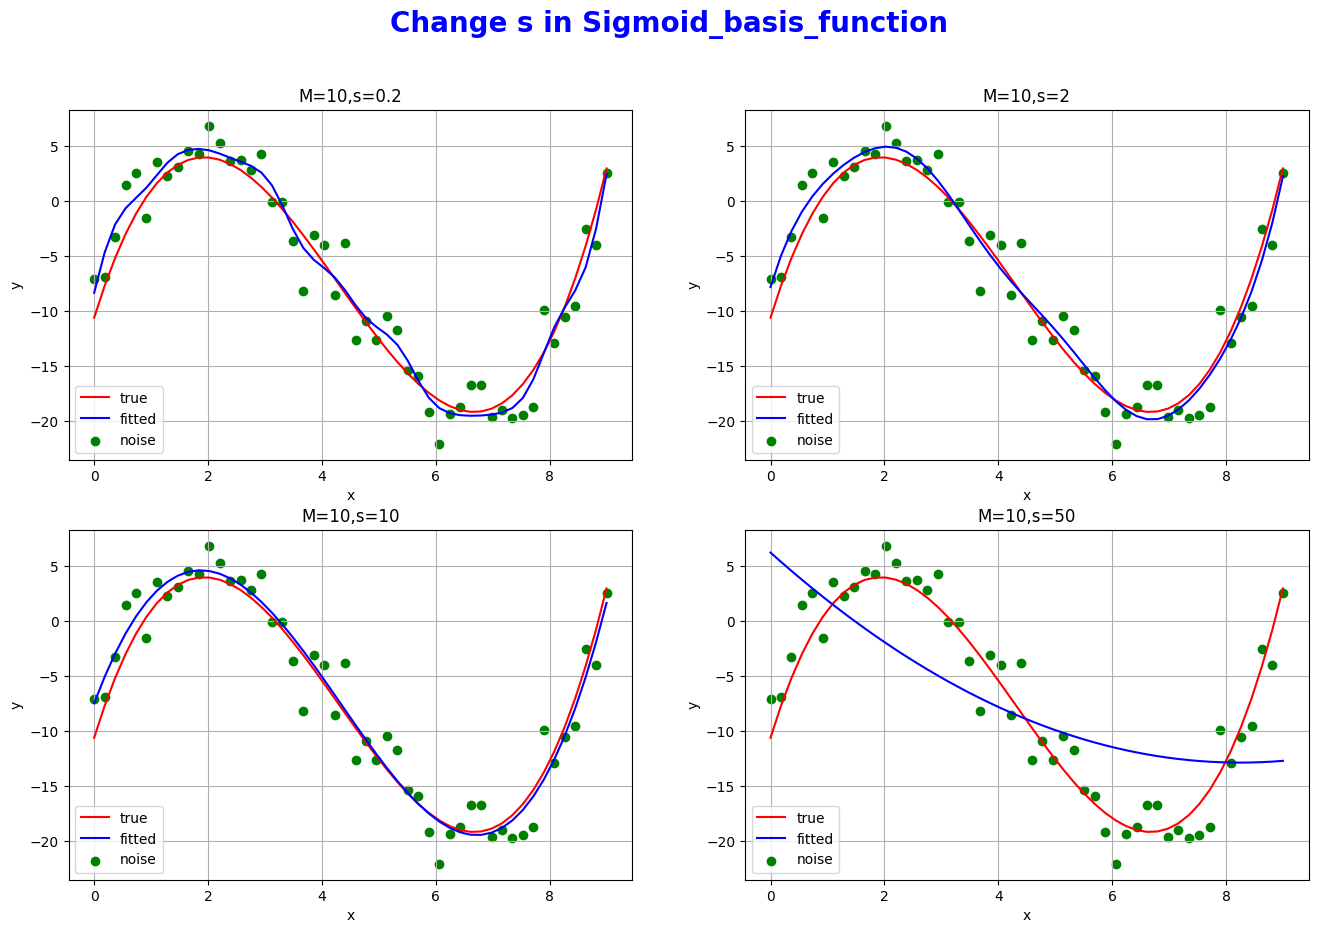

In [8]:
plt.figure(figsize=(16, 10))
M = 10
s_ = [0.2,2,10,50]
for i, s in enumerate(s_):
    w,px = MAP_fitting_S(x_data,y_noisy,M,s)
    y_fitted = px.dot(w)
    plt.subplot(2,2,i+1)
    plt.plot(x_data, y_true, 'r-', label='true')
    plt.plot(x_data, y_fitted, 'b-', label = 'fitted')
    plt.scatter(x_data, y_noisy, c='g', marker='o', label='noise')
    plt.title(f'M={M},s={s}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
plt.suptitle('Change s in Sigmoid_basis_function', fontsize=20, fontweight='bold', color='blue')
plt.show()

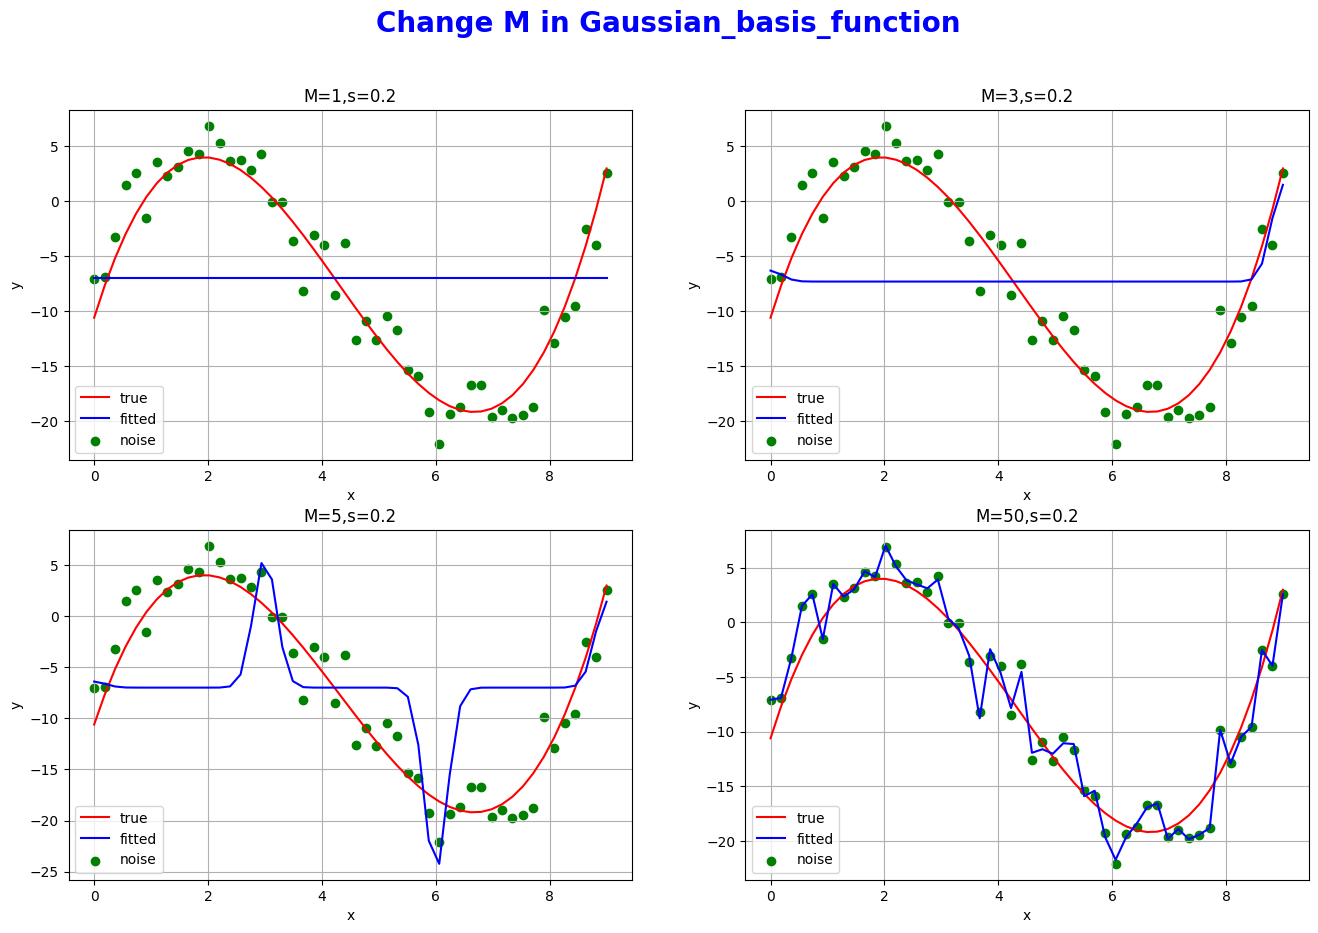

In [9]:
plt.figure(figsize=(16, 10))
M_= [1,3,5,50]
s = 0.2
for i, M in enumerate(M_):
    w,px = MAP_fitting_G(x_data,y_noisy,M,s)
    y_fitted = px.dot(w)
    plt.subplot(2,2,i+1)
    plt.plot(x_data, y_true, 'r-', label='true')
    plt.plot(x_data, y_fitted, 'b-', label = 'fitted')
    plt.scatter(x_data, y_noisy, c='g', marker='o', label='noise')
    plt.title(f'M={M},s={s}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
plt.suptitle('Change M in Gaussian_basis_function', fontsize=20, fontweight='bold', color='blue')
plt.show()

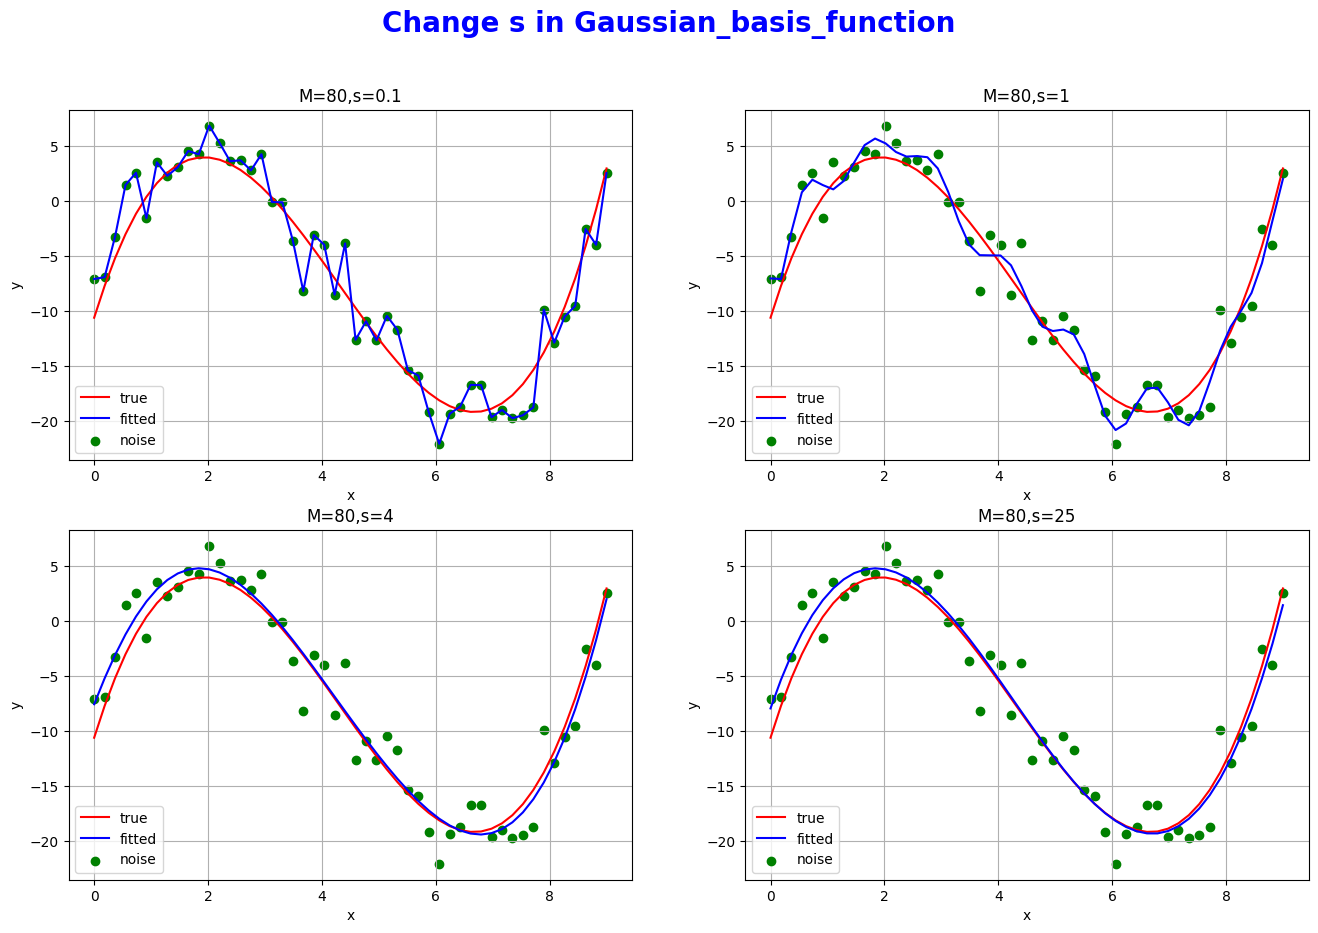

In [10]:
plt.figure(figsize=(16, 10))
M = 80
s_ = [0.1,1,4,25]
for i, s in enumerate(s_):
    w,px = MAP_fitting_G(x_data,y_noisy,M,s)
    y_fitted = px.dot(w)
    plt.subplot(2,2,i+1)
    plt.plot(x_data, y_true, 'r-', label='true')
    plt.plot(x_data, y_fitted, 'b-', label = 'fitted')
    plt.scatter(x_data, y_noisy, c='g', marker='o', label='noise')
    plt.title(f'M={M},s={s}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
plt.suptitle('Change s in Gaussian_basis_function', fontsize=20, fontweight='bold', color='blue')
plt.show()

>7. Discuss the advantages of these basis functions over polynomial functions.

### Ans:

Gaussian basis functions can capture more localized patterns, while sigmoid basis functions can capture non-linear and sigmoidal patterns more effectively than polynomial functions. Additionally, basis functions allow for more fine-grained control over the shape of the fitted curve.

Basis functions offer greater flexibility and expressiveness compared to polynomial functions. While polynomial functions are limited to powers of a single variable, basis functions can be more diverse and capture a wider range of patterns in the data. This flexibility can be particularly useful when dealing with complex and nonlinear relationships.

Polynomial functions, especially high-degree polynomials, are prone to overfitting, where the model fits noise in the data rather than the underlying signal. Basis functions can provide regularization and reduce overfitting by controlling the complexity of the model. By selecting appropriate basis functions and their parameters, you can strike a balance between model complexity and generalization.